# To Explore Supervised Machine Learning

Undertaking linear regression to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

In [25]:
import numpy as np  #Importing the necessities
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
url = 'http://bit.ly/w-data'  #importing dataset from given url
df = pd.read_csv(url)

In [27]:
df.head()  #checking the head of dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Data Visualization

Text(0, 0.5, 'Percentage Score')

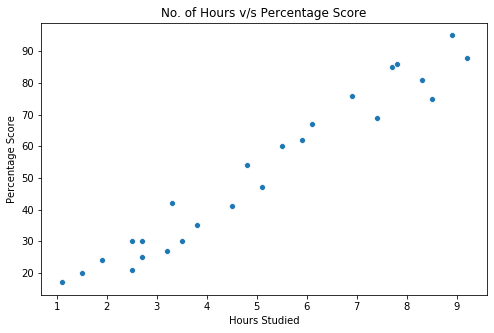

In [28]:
# plotting the distribution of score against no. of hours studied by student.
plt.figure(figsize=(8,5)) 
sns.scatterplot(x = df['Hours'], y = df['Scores'], data = df)
plt.title('No. of Hours v/s Percentage Score')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

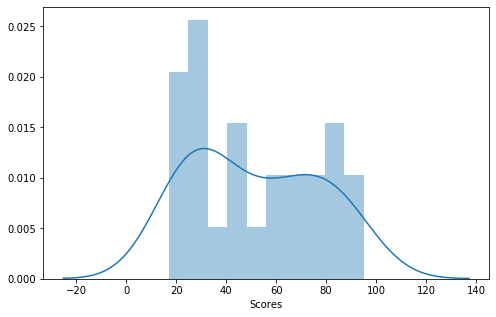

In [29]:
plt.figure(figsize=(8,5))  #Distribution plot for percentage scores
sns.distplot(df['Scores'], bins = 10)

# Training a Linear Regression Model

We will begin our regression analysis by training the dataset. We need to first split up our data into an X array (containing the features to train on) and an Y array (containing target variables).

In [30]:
x = df[['Hours']]  #defining the independent and dependent variables
y = df[['Scores']]

In [31]:
from sklearn.model_selection import train_test_split  #Evaluating model using train_test_split

In [32]:
#splitting our dataset into training and testing data
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.1, random_state = 101)  

# Creating and Training the Model

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lm = LinearRegression()
lm.fit(x_train, y_train)  #fitting the linear regression model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Model Evaluation

In [35]:
print(lm.intercept_)  #print the intercept
print(lm.coef_)

[2.8516016]
[[9.65197453]]


Text(0, 0.5, 'Percentage Score')

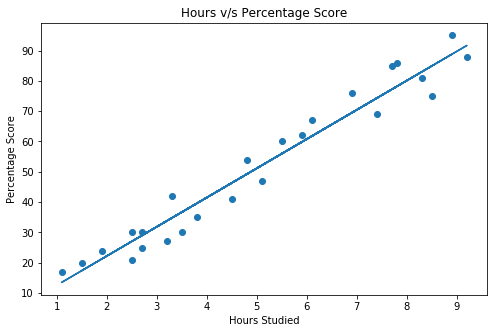

In [36]:
line = lm.coef_*x + lm.intercept_  #plotting regression line as follows

plt.figure(figsize=(8,5))  #plotting for the test data
plt.scatter(x,y)
plt.plot(x, line);
plt.title('Hours v/s Percentage Score')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

In [37]:
print('Training score :', lm.score(x_train, y_train))  #predictions from our model
print('Test score :', lm.score(x_test, y_test))

Training score : 0.9529159068630462
Test score : 0.950862414343374


In [38]:
predictions = lm.predict(x_test)

In [39]:
print('No. of Hours = ', 9.25)
print('Predicted percentage score = ',lm.predict([[9.25]])[0][0])

No. of Hours =  9.25
Predicted percentage score =  92.13236597362464


# Regression Evaluation Metrics 

In [40]:
from sklearn import metrics

In [41]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.125253809754423
MSE: 30.301511154919314
RMSE: 5.504680840422932
